In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import (GradientBoostingRegressor, StackingRegressor, VotingRegressor,
                              BaggingRegressor, HistGradientBoostingRegressor, RandomForestRegressor)
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
# Load data
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Unnamed: 0,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE,TAVG
0,0,01-11-1979,63.88,77.52,128,NaN,0.0,17.6,NaN,12.96,...,78.93,64,0.0,0.00,18.7,NaN,NaN,63.933,78.733,9.3
1,1,13-11-1979,63.88,77.52,128,NaN,0.0,8.8,NaN,0.00,...,78.93,64,0.0,0.00,11.0,-3.8,2.04,63.933,78.733,2.7
2,2,05-02-1980,63.88,77.52,128,NaN,0.0,-9.9,NaN,-17.76,...,78.93,64,0.0,0.00,NaN,NaN,-16.56,63.933,78.733,-16.0
3,3,23-12-1979,63.88,77.52,128,0.0,0.0,NaN,-4.30,-4.44,...,78.93,64,0.0,0.00,0.0,NaN,-2.64,63.933,78.733,-3.2
4,4,07-06-1977,63.88,77.52,128,NaN,0.0,39.6,15.48,NaN,...,78.93,64,NaN,3.82,38.5,17.1,33.00,63.933,78.733,27.3


In [4]:
test_df.head()

,INDEX,DATE,LATITUDE_A,LONGITUDE_A,ELEVATION_A,PRCP_A,SNWD_A,TMAX_A,TMIN_A,TAVG_A,...,LATITUDE_C,LONGITUDE_C,ELEVATION_C,PRCP_C,SNWD_C,TMAX_C,TMIN_C,TAVG_C,LATITUDE,LONGITUDE
0,0,04-11-1978,63.883,77.517,128,0.0,0.0,5.0,NaN,2.3,...,63.083,78.933,64,NaN,0.00,8.0,NaN,3.0,63.933,78.733
1,1,11-04-1980,63.883,77.517,128,NaN,0.0,NaN,NaN,9.3,...,63.083,78.933,64,0.0,0.00,28.0,8.0,15.0,63.933,78.733
2,2,29-04-1977,63.883,77.517,128,NaN,0.0,NaN,NaN,18.0,...,63.083,78.933,64,0.0,2.89,30.0,NaN,15.8,63.933,78.733
3,3,12-10-1977,63.883,77.517,128,0.0,0.0,16.0,NaN,9.8,...,63.083,78.933,64,0.0,0.00,19.0,NaN,12.4,63.933,78.733
4,4,02-09-1980,63.883,77.517,128,NaN,0.0,29.0,10.0,18.8,...,63.083,78.933,64,500.0,0.00,30.0,NaN,21.4,63.933,78.733


In [5]:
#Drop unnecessary columns
train_df=train_df.drop(columns=['Unnamed: 0'])
test_df=test_df.drop(columns=['INDEX'])

In [6]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         812 non-null    object 
 1   LATITUDE_A   812 non-null    float64
 2   LONGITUDE_A  812 non-null    float64
 3   ELEVATION_A  812 non-null    int64  
 4   PRCP_A       251 non-null    float64
 5   SNWD_A       812 non-null    float64
 6   TMAX_A       567 non-null    float64
 7   TMIN_A       289 non-null    float64
 8   TAVG_A       742 non-null    float64
 9   LATITUDE_B   812 non-null    float64
 10  LONGITUDE_B  812 non-null    float64
 11  ELEVATION_B  812 non-null    int64  
 12  PRCP_B       812 non-null    int64  
 13  SNWD_B       812 non-null    float64
 14  TMAX_B       812 non-null    float64
 15  TMIN_B       812 non-null    float64
 16  TAVG_B       742 non-null    float64
 17  LATITUDE_C   812 non-null    float64
 18  LONGITUDE_C  812 non-null    float64
 19  ELEVATIO

In [7]:
train_df.isnull().sum()

,0
DATE,0
LATITUDE_A,0
LONGITUDE_A,0
ELEVATION_A,0
PRCP_A,561
SNWD_A,0
TMAX_A,245
TMIN_A,523
TAVG_A,70
LATITUDE_B,0


In [8]:
# Fill missing values in train_df with the mean of their respective columns
train_df.fillna({
    'PRCP_A': train_df['PRCP_A'].mean(),
    'TMAX_A': train_df['TMAX_A'].mean(),
    'TMIN_A': train_df['TMIN_A'].mean(),
    'TAVG_A': train_df['TAVG_A'].mean(),
    'TAVG_B': train_df['TAVG_B'].mean(),
    'PRCP_C': train_df['PRCP_C'].mean(),
    'TMAX_C': train_df['TMAX_C'].mean(),
    'TMIN_C': train_df['TMIN_C'].mean(),
    'TAVG_C': train_df['TAVG_C'].mean()
}, inplace=True)

# Verify that there are no more missing values
print(train_df.isnull().sum())


DATE           0
LATITUDE_A     0
LONGITUDE_A    0
ELEVATION_A    0
PRCP_A         0
SNWD_A         0
TMAX_A         0
TMIN_A         0
TAVG_A         0
LATITUDE_B     0
LONGITUDE_B    0
ELEVATION_B    0
PRCP_B         0
SNWD_B         0
TMAX_B         0
TMIN_B         0
TAVG_B         0
LATITUDE_C     0
LONGITUDE_C    0
ELEVATION_C    0
PRCP_C         0
SNWD_C         0
TMAX_C         0
TMIN_C         0
TAVG_C         0
LATITUDE       0
LONGITUDE      0
TAVG           0
dtype: int64


In [9]:
test_df.isnull().sum()

,0
DATE,0
LATITUDE_A,0
LONGITUDE_A,0
ELEVATION_A,0
PRCP_A,133
SNWD_A,0
TMAX_A,61
TMIN_A,145
TAVG_A,0
LATITUDE_B,0


In [10]:
# Fill missing values in test_df with the mean of their respective columns
test_df.fillna({
    'PRCP_A': test_df['PRCP_A'].mean(),
    'TMAX_A': test_df['TMAX_A'].mean(),
    'TMIN_A': test_df['TMIN_A'].mean(),
    'TAVG_A': test_df['TAVG_A'].mean(),
    'TAVG_B': test_df['TAVG_B'].mean(),
    'PRCP_C': test_df['PRCP_C'].mean(),
    'TMAX_C': test_df['TMAX_C'].mean(),
    'TMIN_C': test_df['TMIN_C'].mean(),
    'TAVG_C': test_df['TAVG_C'].mean()
}, inplace=True)

# Verify that there are no more missing values
print(test_df.isnull().sum())


DATE           0
LATITUDE_A     0
LONGITUDE_A    0
ELEVATION_A    0
PRCP_A         0
SNWD_A         0
TMAX_A         0
TMIN_A         0
TAVG_A         0
LATITUDE_B     0
LONGITUDE_B    0
ELEVATION_B    0
PRCP_B         0
SNWD_B         0
TMAX_B         0
TMIN_B         0
TAVG_B         0
LATITUDE_C     0
LONGITUDE_C    0
ELEVATION_C    0
PRCP_C         0
SNWD_C         0
TMAX_C         0
TMIN_C         0
TAVG_C         0
LATITUDE       0
LONGITUDE      0
dtype: int64


In [11]:
# Date transformations
for df in [train_df, test_df]:
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
    df['DAY_OF_YEAR'] = df['DATE'].dt.dayofyear
    df['MONTH'] = df['DATE'].dt.month
    df.drop(columns=['DATE'], inplace=True)


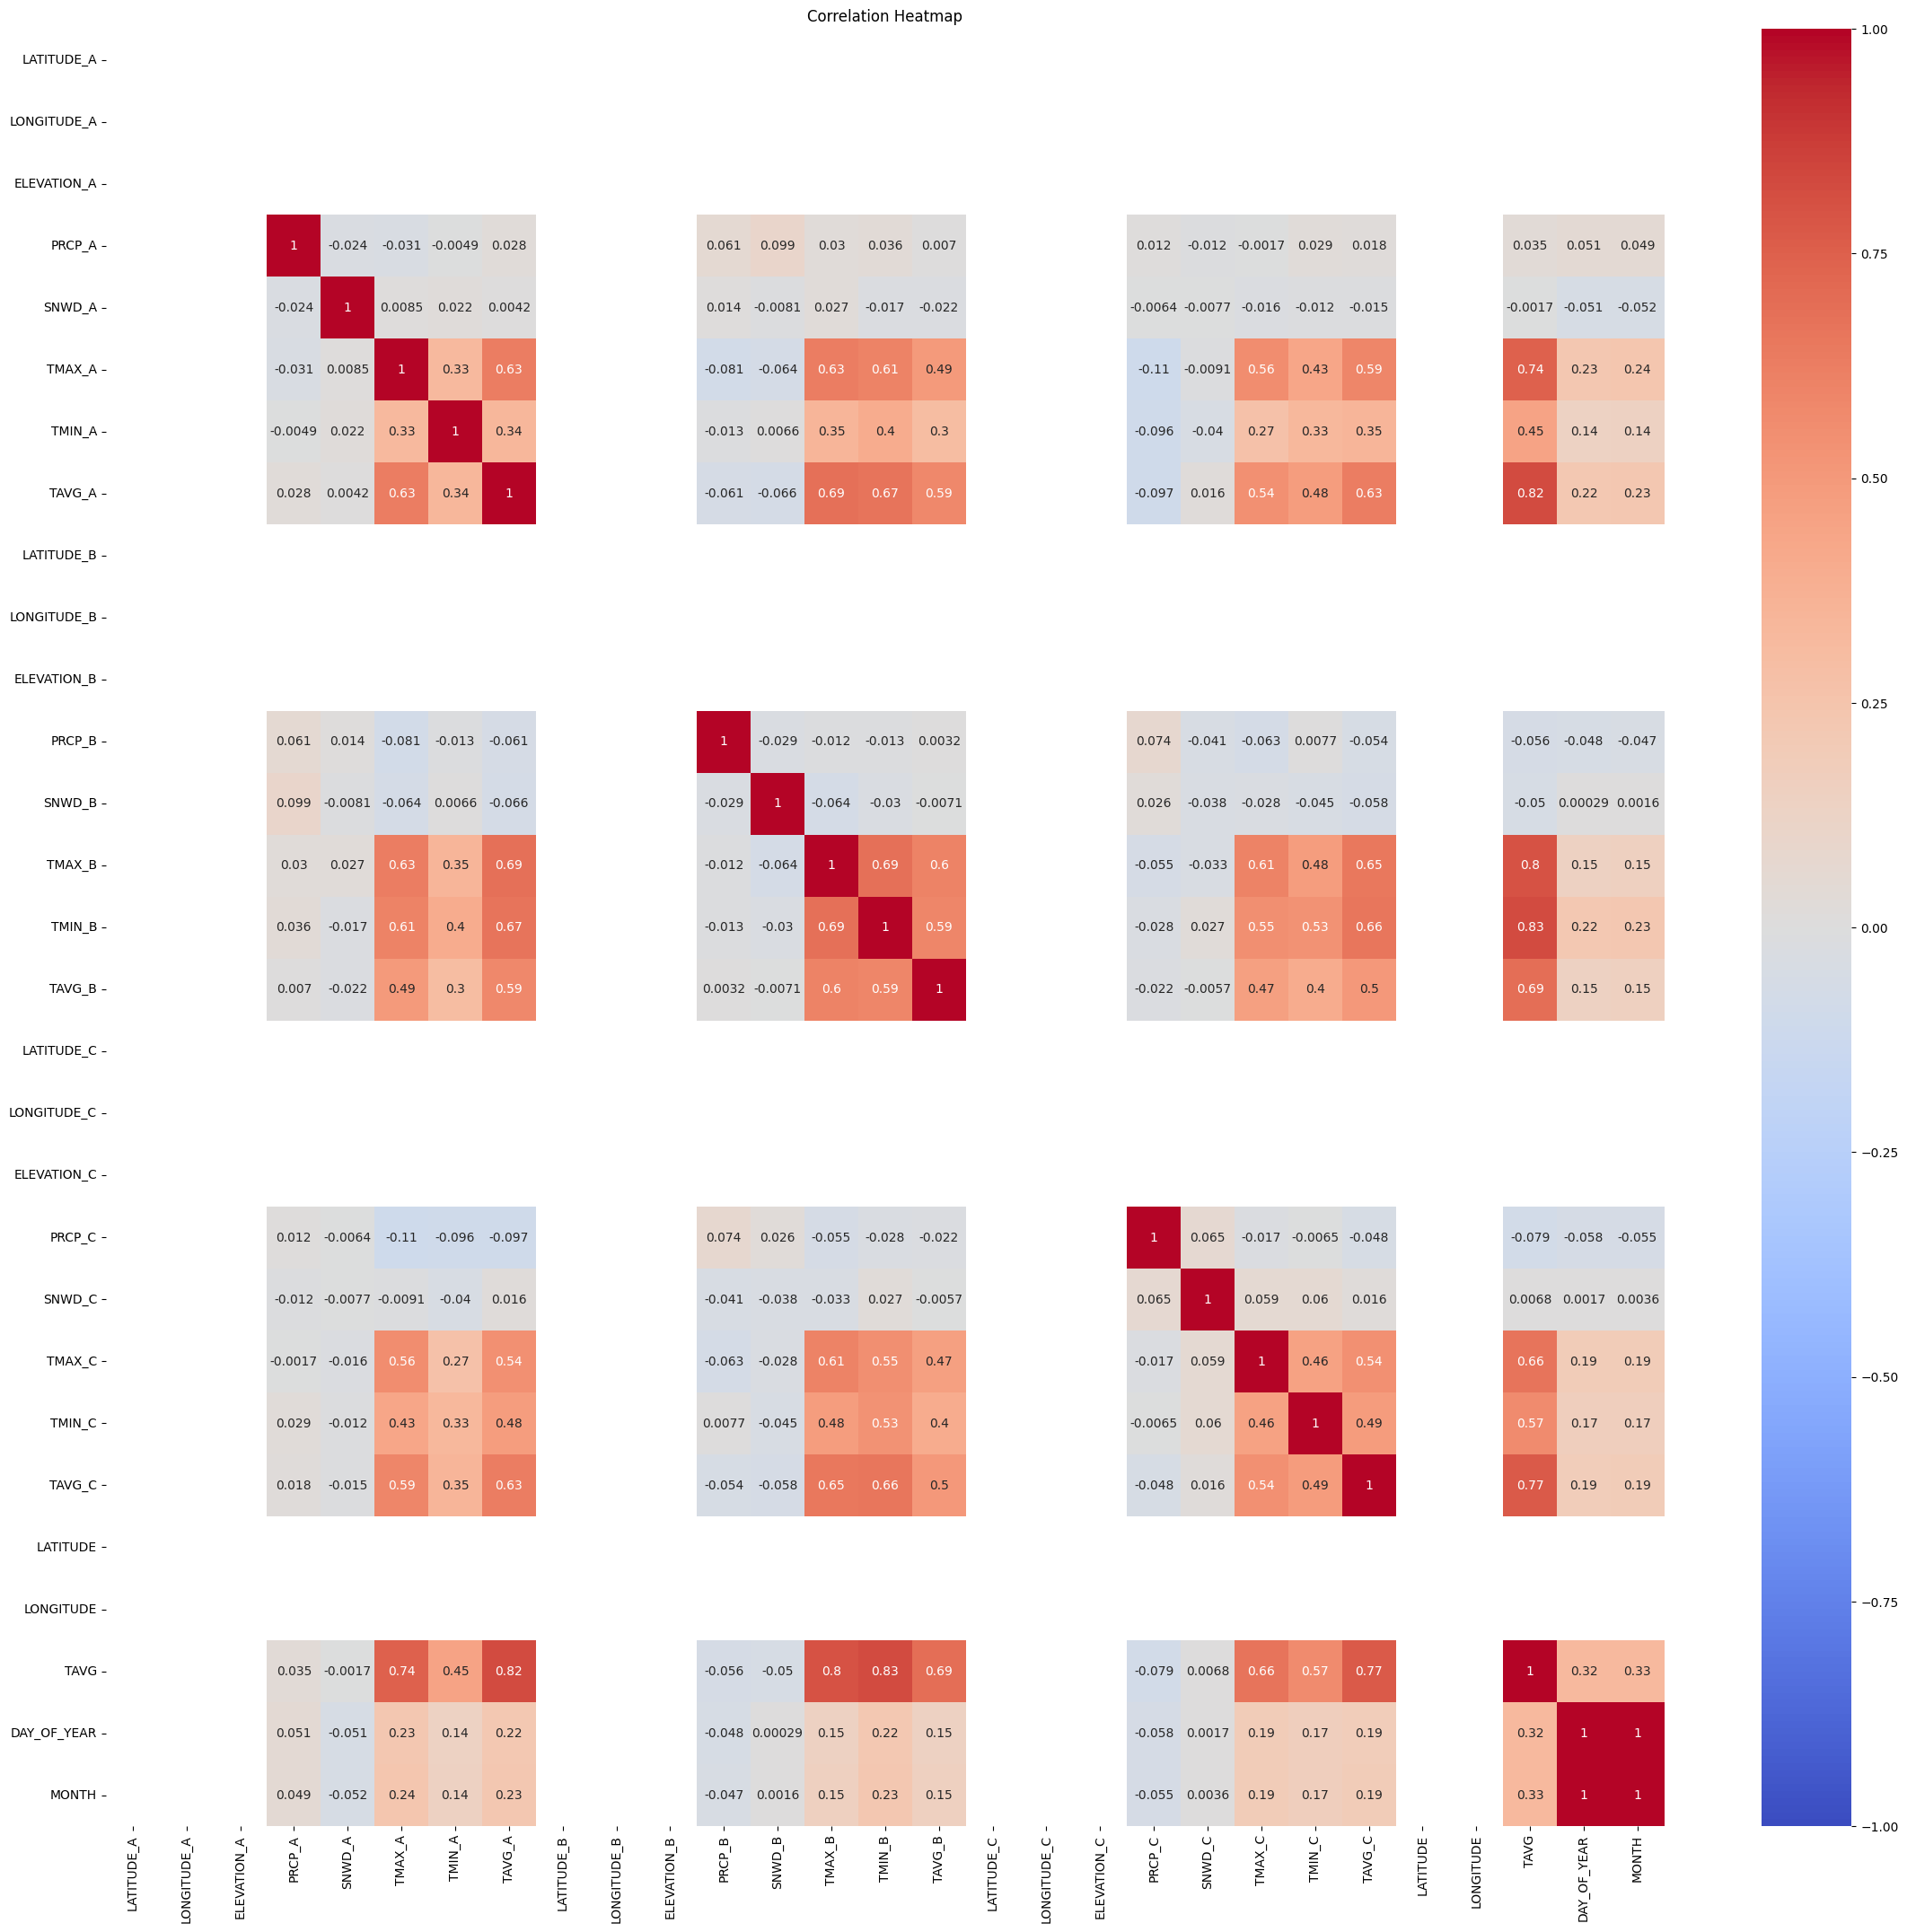

In [12]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(28, 26))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



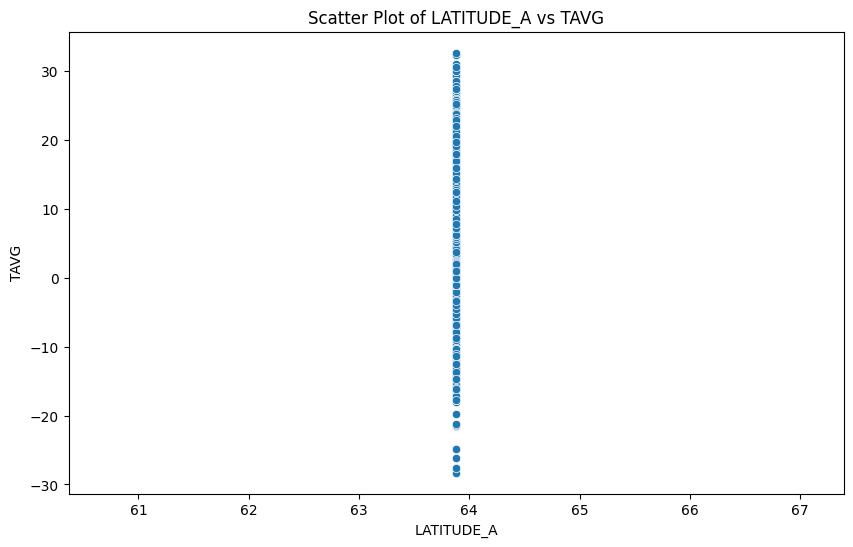

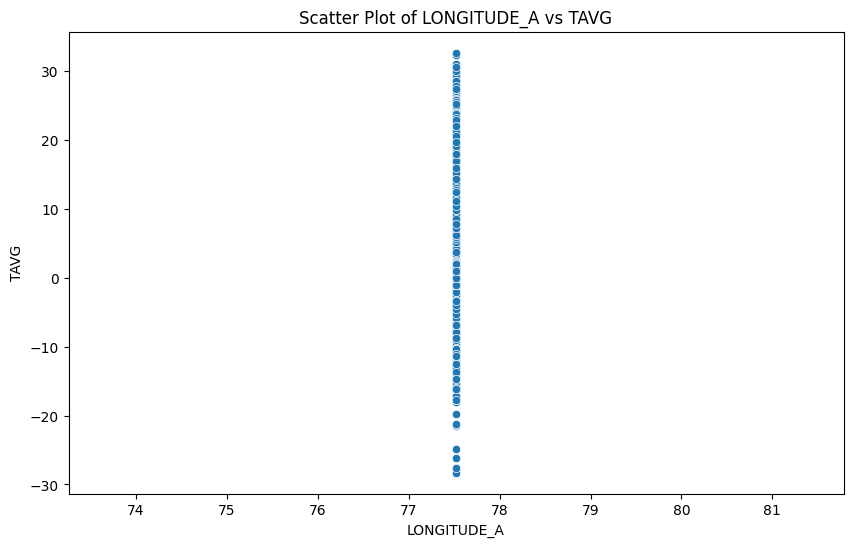

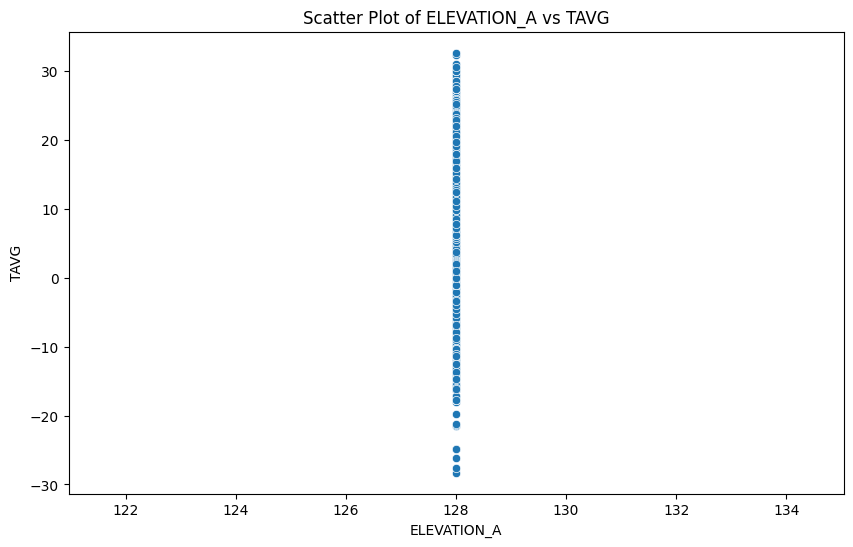

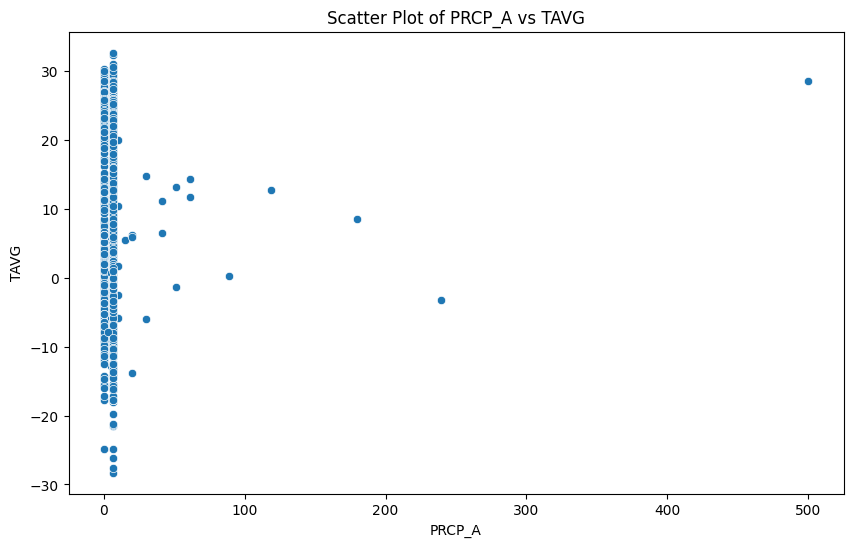

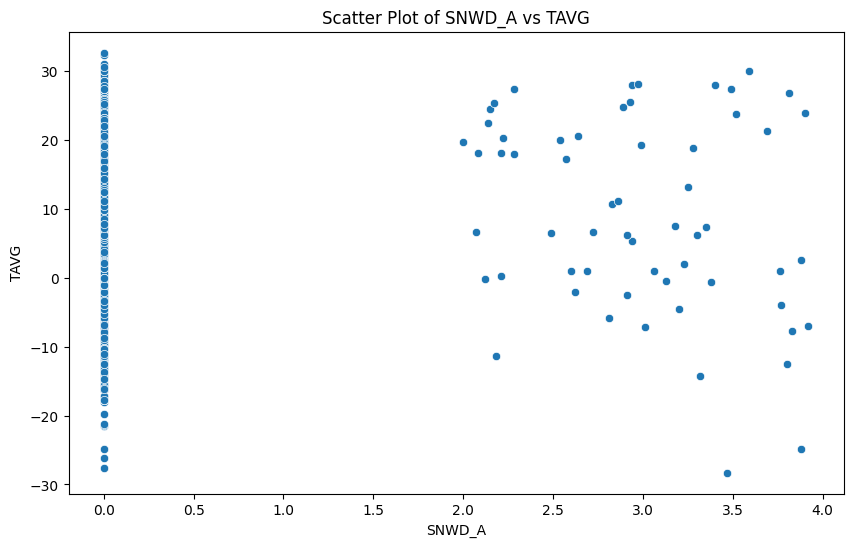

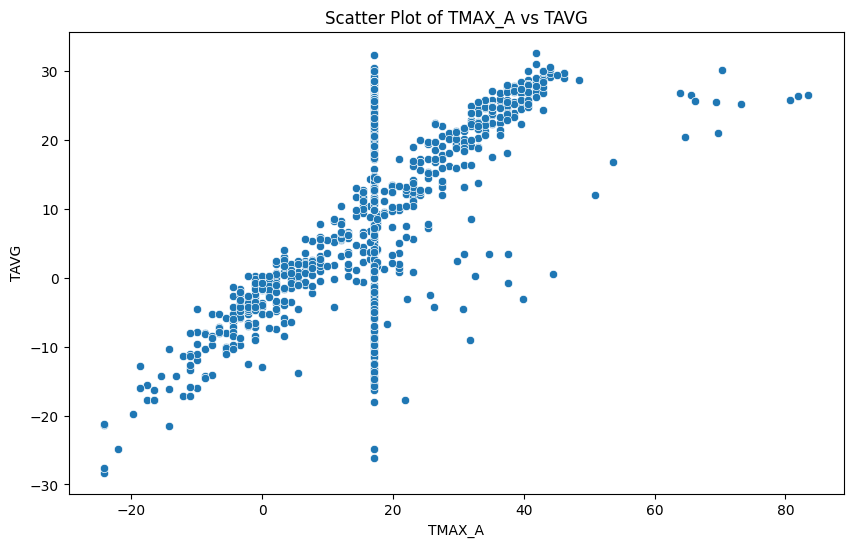

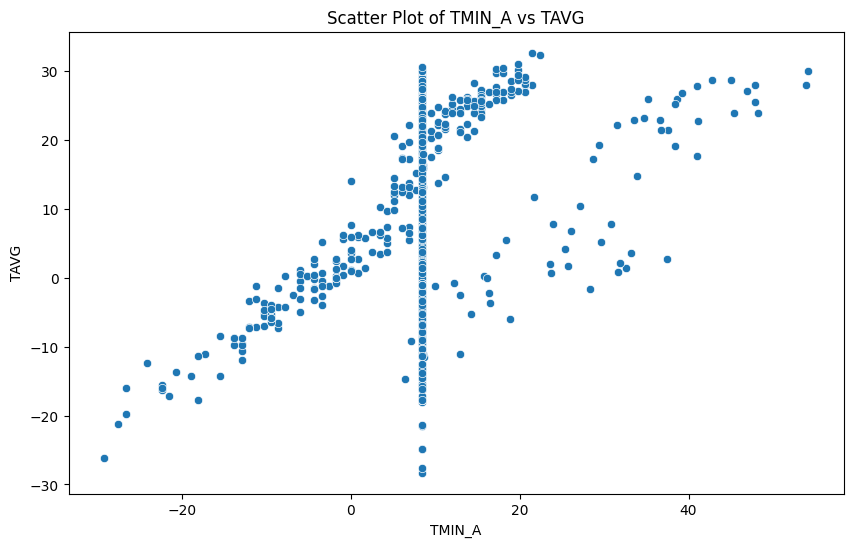

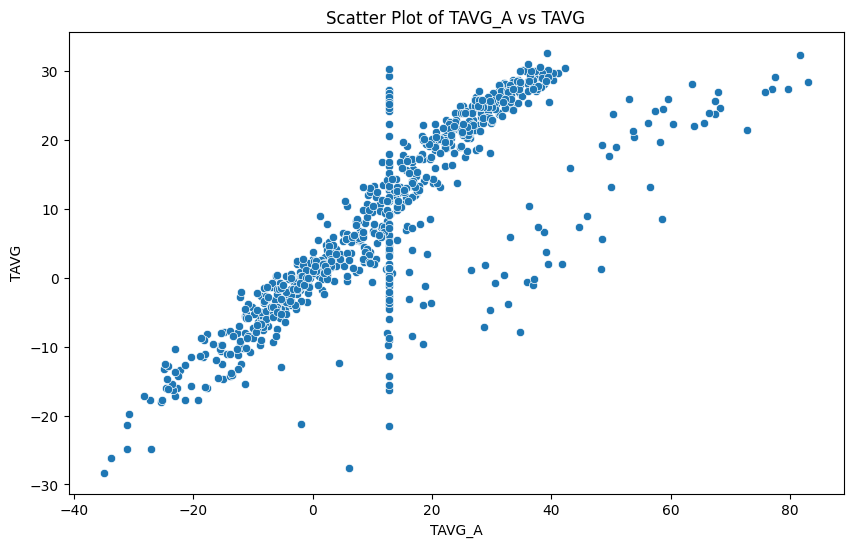

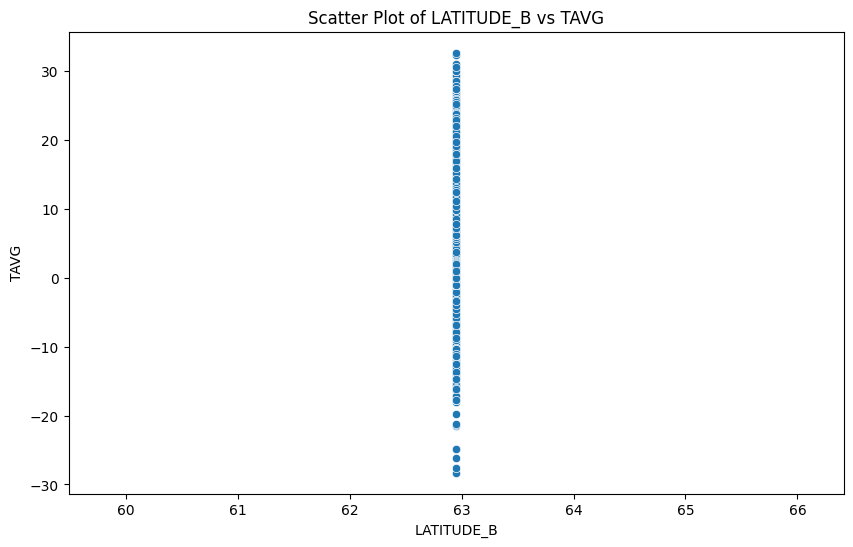

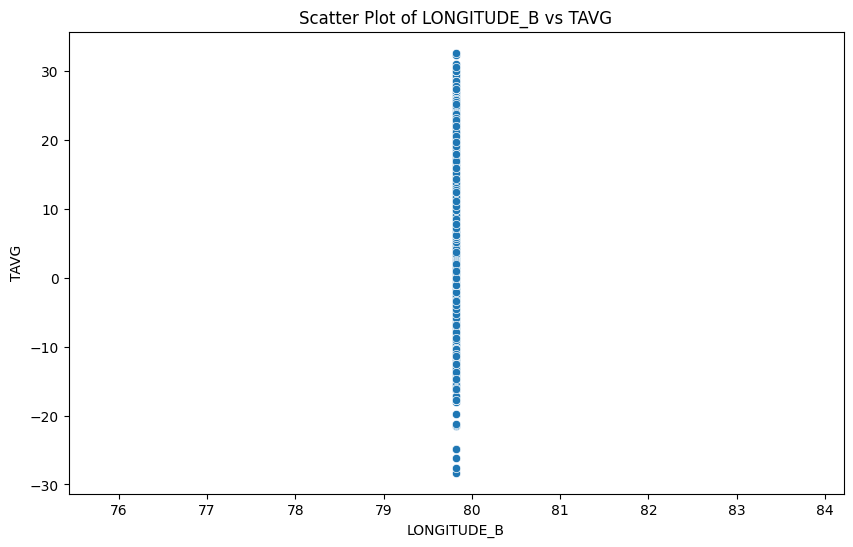

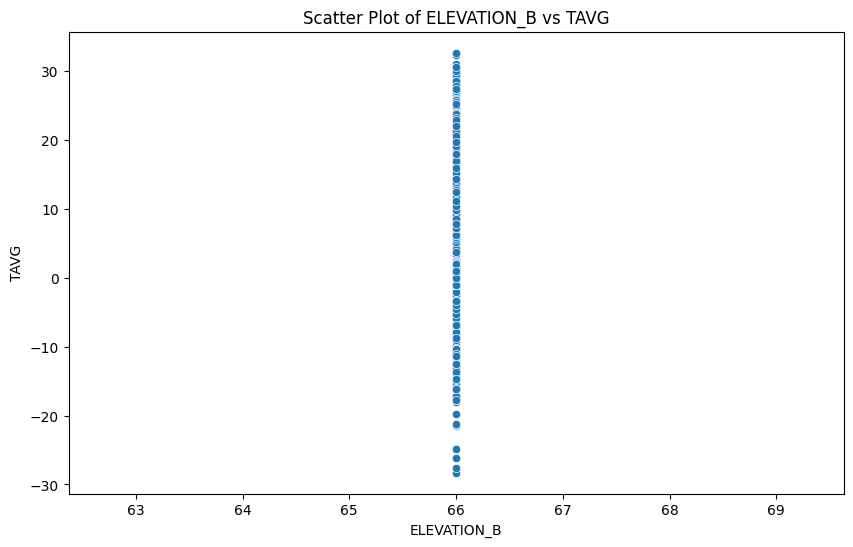

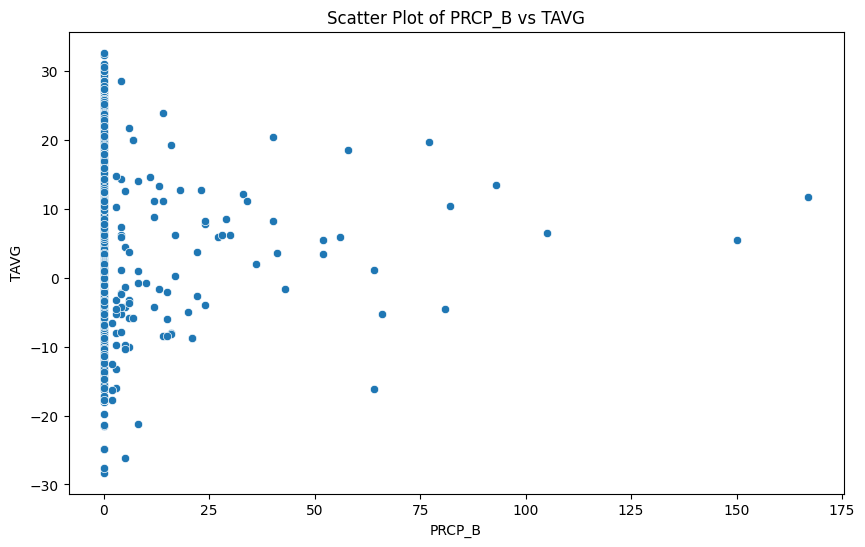

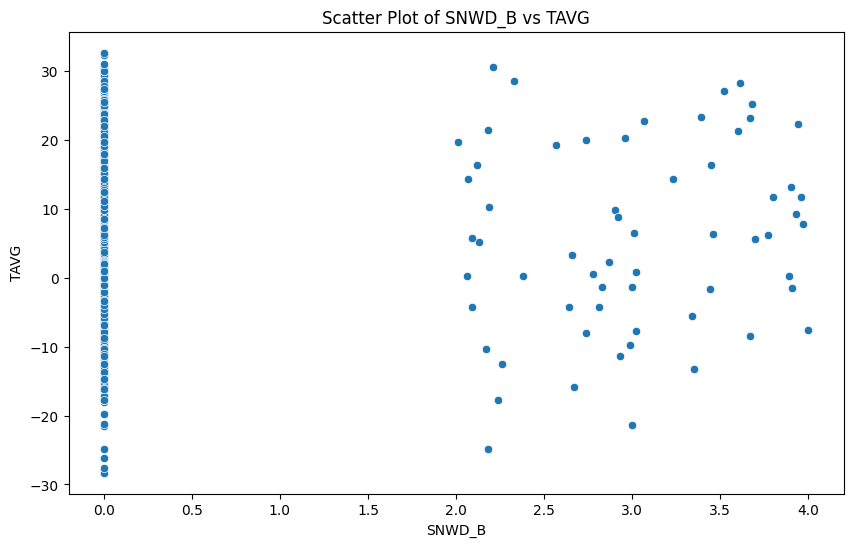

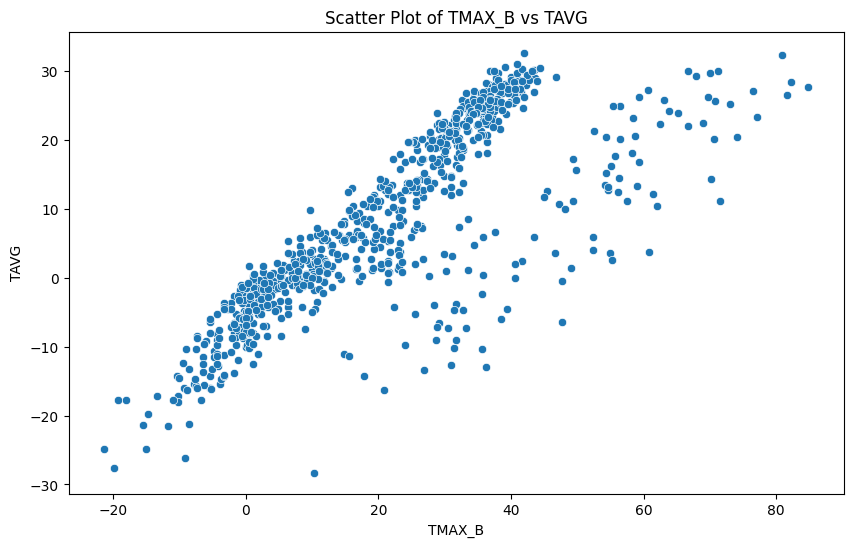

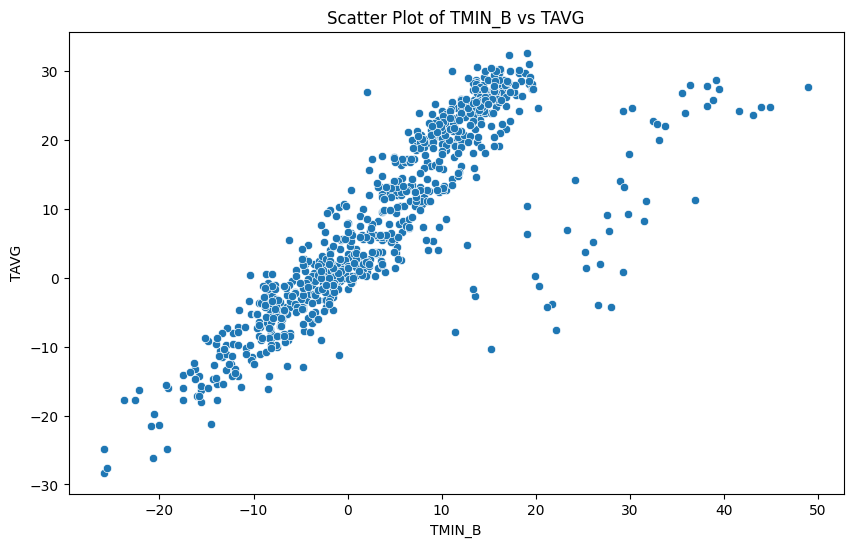

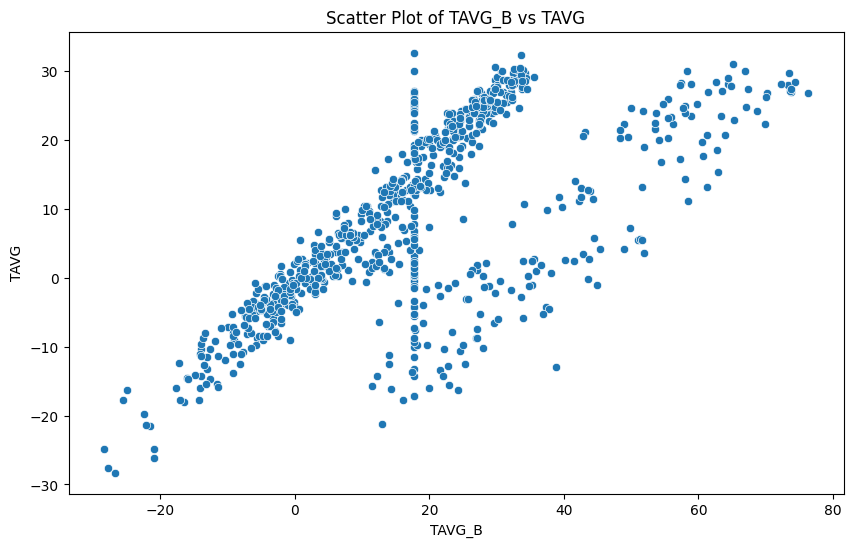

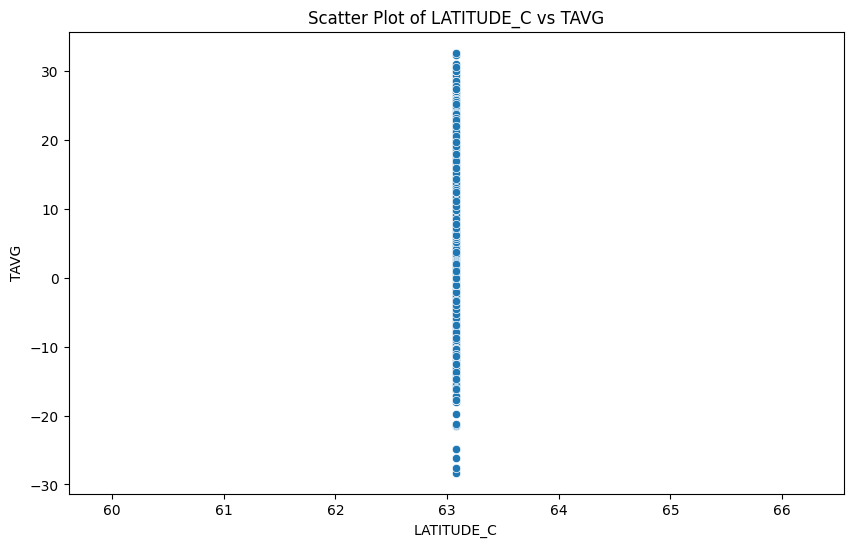

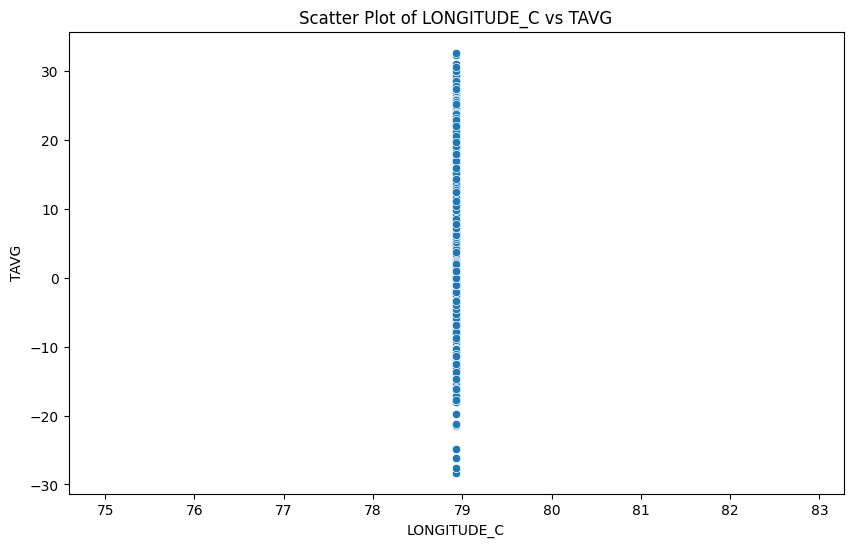

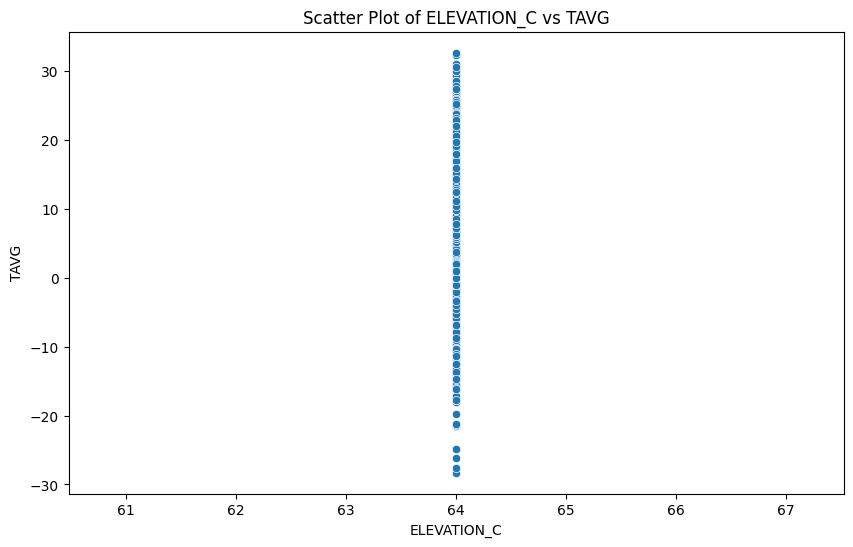

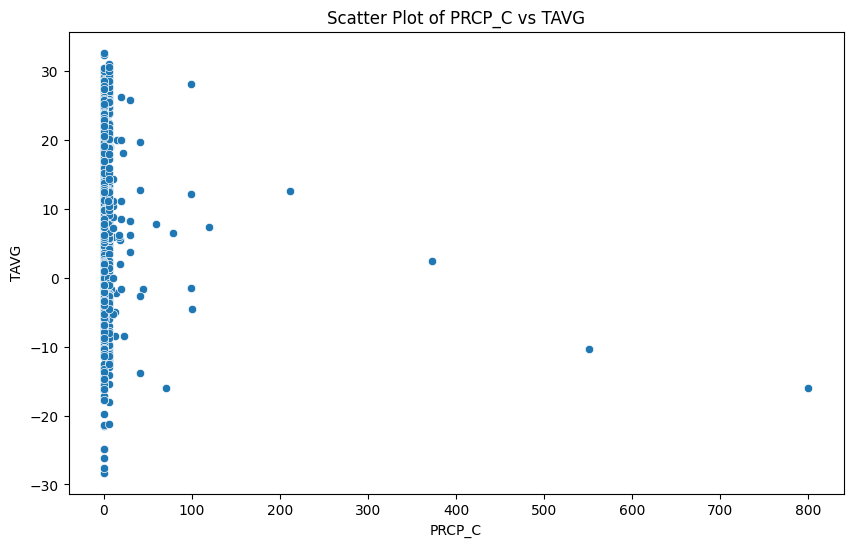

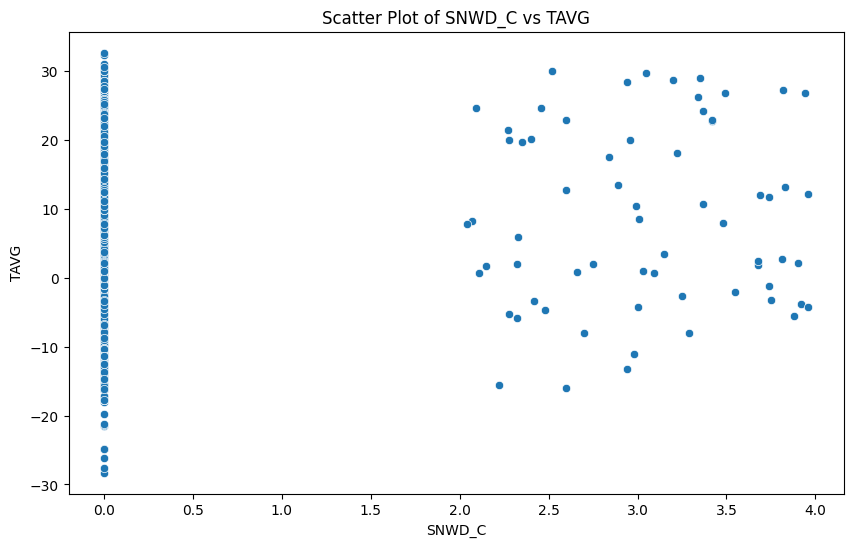

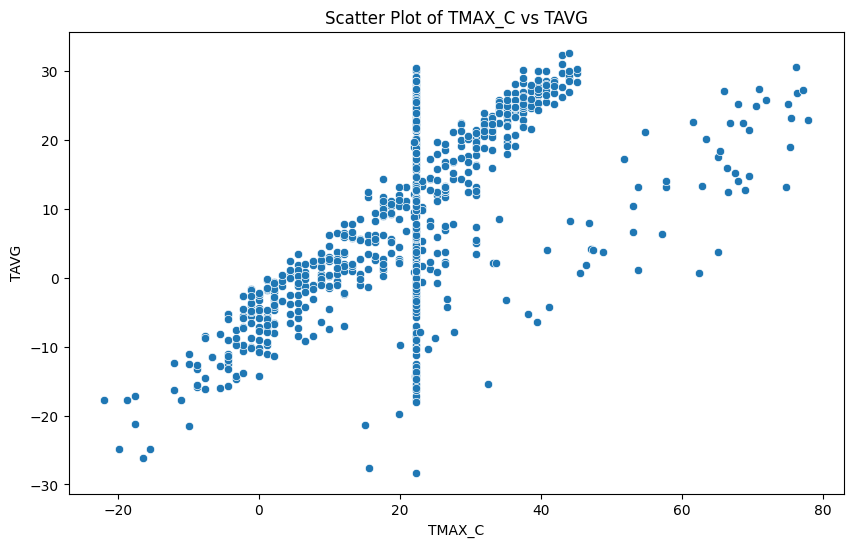

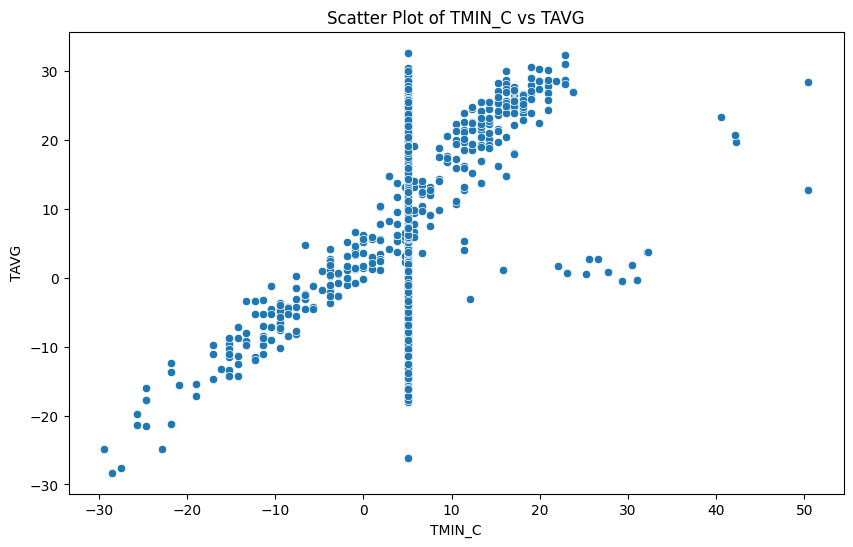

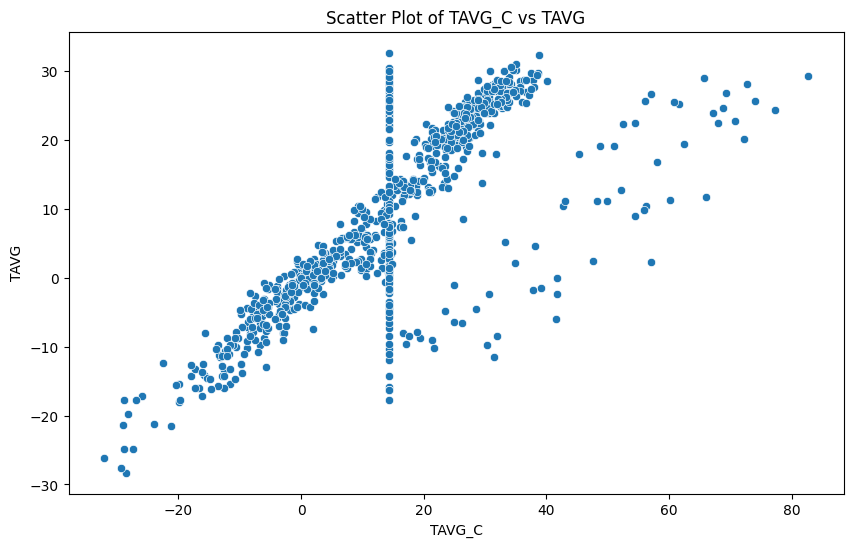

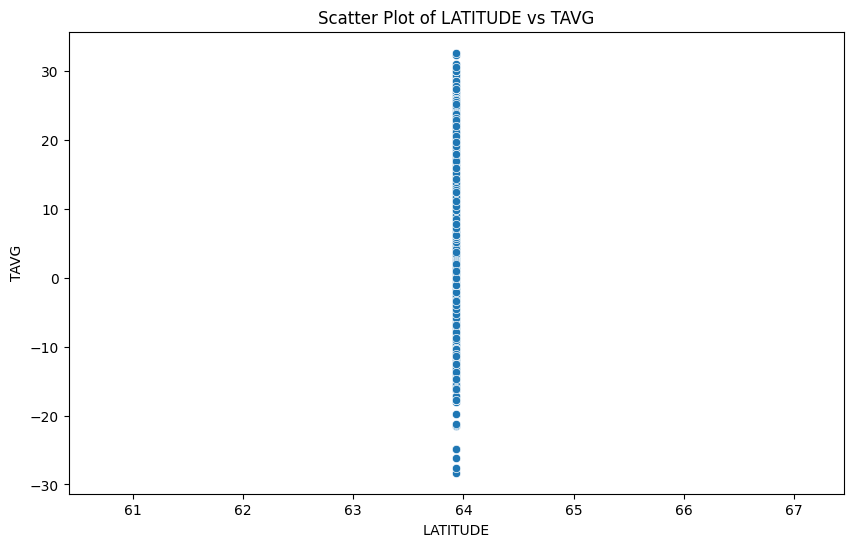

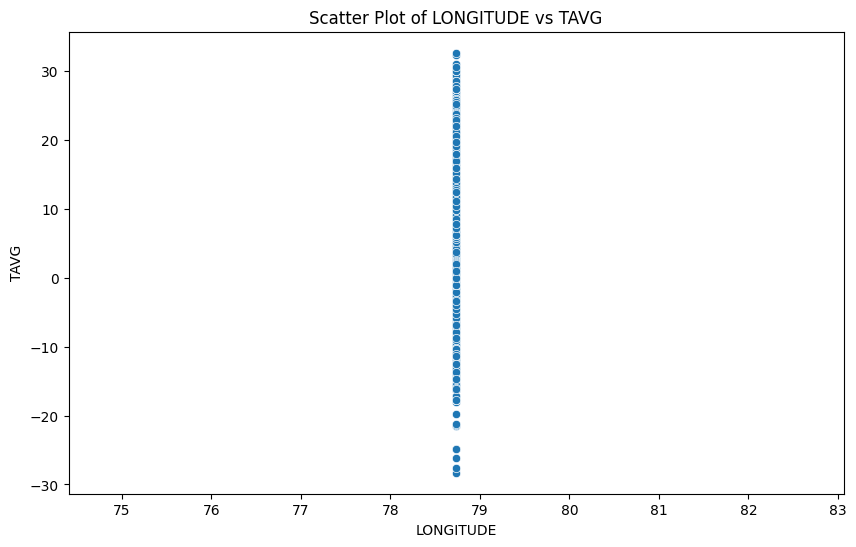

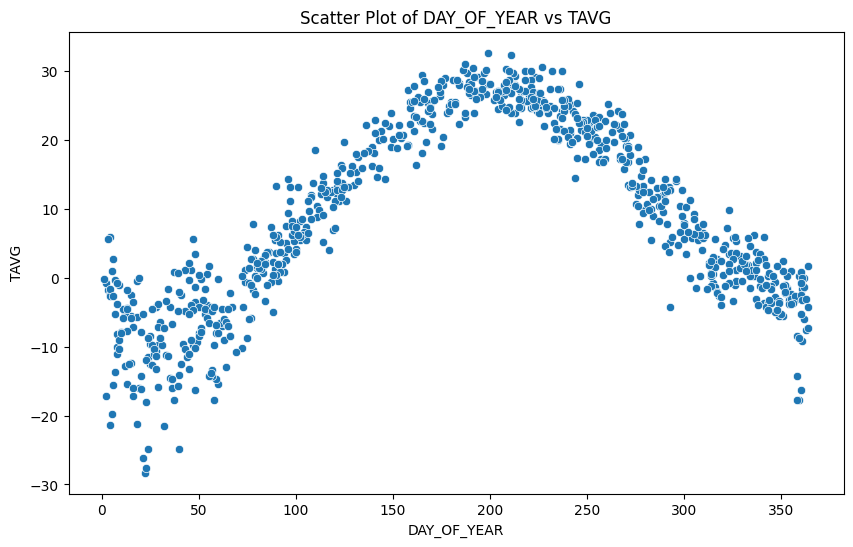

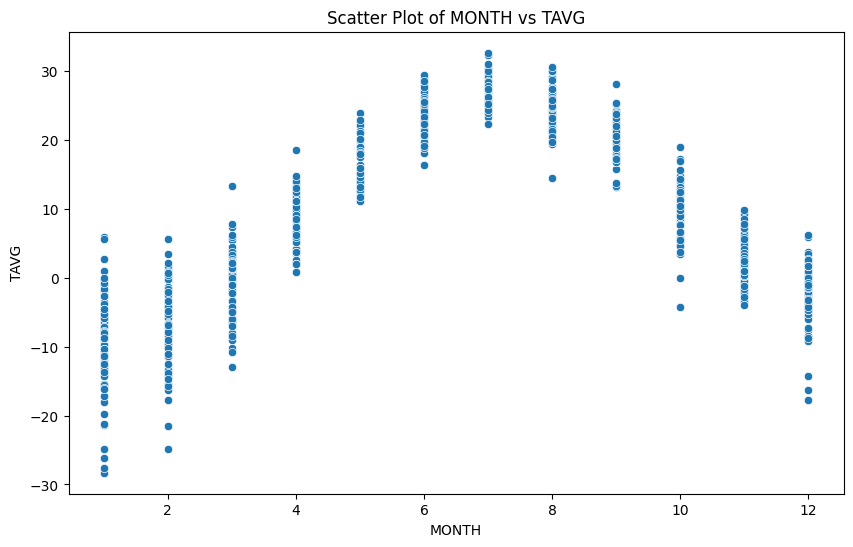

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

target_variable = 'TAVG'

# List of feature columns (excluding the target variable)
feature_columns = [col for col in train_df.columns if col != target_variable]

# Create scatter plots for each feature against the target variable
for feature in feature_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=train_df[feature], y=train_df[target_variable])
    plt.title(f'Scatter Plot of {feature} vs {target_variable}')
    plt.xlabel(feature)
    plt.ylabel(target_variable)
    plt.show()


In [14]:
# Feature Engineering

def add_features(df):
    df['avg_precipitation'] = df[['PRCP_A', 'PRCP_B', 'PRCP_C']].mean(axis=1)
    df['avg_max_temp'] = df[['TMAX_A', 'TMAX_B', 'TMAX_C']].mean(axis=1)
    df['avg_min_temp'] = df[['TMIN_A', 'TMIN_B', 'TMIN_C']].mean(axis=1)
    df['avg_temp'] = df[['TAVG_A', 'TAVG_B', 'TAVG_C']].mean(axis=1)
    df['temp_variability'] = df[['TAVG_A', 'TAVG_B', 'TAVG_C']].std(axis=1)
    df['temp_range'] = df[['TAVG_A', 'TAVG_B', 'TAVG_C']].max(axis=1) - df[['TAVG_A', 'TAVG_B', 'TAVG_C']].min(axis=1)
    df['lat_temp_interaction'] = df['LATITUDE'] * df['avg_temp']
    df['lon_temp_interaction'] = df['LONGITUDE'] * df['avg_temp']
    df['avg_elevation'] = df[['ELEVATION_A', 'ELEVATION_B', 'ELEVATION_C']].mean(axis=1)
    df['sin_day_of_year'] = np.sin(2 * np.pi * df['DAY_OF_YEAR'] / 365)
    df['cos_day_of_year'] = np.cos(2 * np.pi * df['DAY_OF_YEAR'] / 365)
    df['sin_month'] = np.sin(2 * np.pi * df['MONTH'] / 12)
    df['diurnal_temp_range_A'] = df['TMAX_A'] - df['TMIN_A']
    df['diurnal_temp_range_B'] = df['TMAX_B'] - df['TMIN_B']
    df['diurnal_temp_range_C'] = df['TMAX_C'] - df['TMIN_C']
    df['lon_temp_interaction_A'] = df['LONGITUDE_A'] * df['TAVG_A']
    df['lon_temp_interaction_B'] = df['LONGITUDE_B'] * df['TAVG_B']
    df['lon_temp_interaction_C'] = df['LONGITUDE_C'] * df['TAVG_C']
    df['Average_TAVG'] = df[['TAVG_A', 'TAVG_B', 'TAVG_C']].mean(axis=1)
    df['TMAX_Range'] = df['TMAX_A'] - df['TMIN_A']
    df['TMIN_Range'] = df['TMAX_B'] - df['TMIN_B']
    return df

In [15]:
train_df = add_features(train_df)
test_df = add_features(test_df)

In [16]:
# Polynomial Features
poly_features = ['LATITUDE', 'LONGITUDE', 'avg_elevation']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_train = poly.fit_transform(train_df[poly_features])
poly_test = poly.transform(test_df[poly_features])
poly_train_df = pd.DataFrame(poly_train, columns=poly.get_feature_names_out(poly_features))
poly_test_df = pd.DataFrame(poly_test, columns=poly.get_feature_names_out(poly_features))

train_df = pd.concat([train_df, poly_train_df], axis=1)
test_df = pd.concat([test_df, poly_test_df], axis=1)


In [17]:
#Check for missing values after feature engineering
missing_value_columns_train = train_df.columns[train_df.isnull().any()].tolist()
missing_value_columns_test = test_df.columns[test_df.isnull().any()].tolist()
print(missing_value_columns_train)
print(missing_value_columns_test)

[]
[]


In [18]:
# Drop unnecessary columns
cols_to_drop = ['PRCP_A', 'PRCP_C','SNWD_B', 'SNWD_C', 'PRCP_B','avg_elevation','MONTH','LATITUDE_A', 'LATITUDE','ELEVATION_A', 'SNWD_A', 'LATITUDE_B', 'LONGITUDE_B',
    'ELEVATION_B', 'LATITUDE_C', 'LONGITUDE_C', 'ELEVATION_C', 'LATITUDE','LONGITUDE','avg_elevation^2',
    'LONGITUDE avg_elevation',
    'LONGITUDE^2',
    'LATITUDE avg_elevation',
    'LATITUDE LONGITUDE',
    'LATITUDE^2',
    'LONGITUDE_A','avg_precipitation']
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

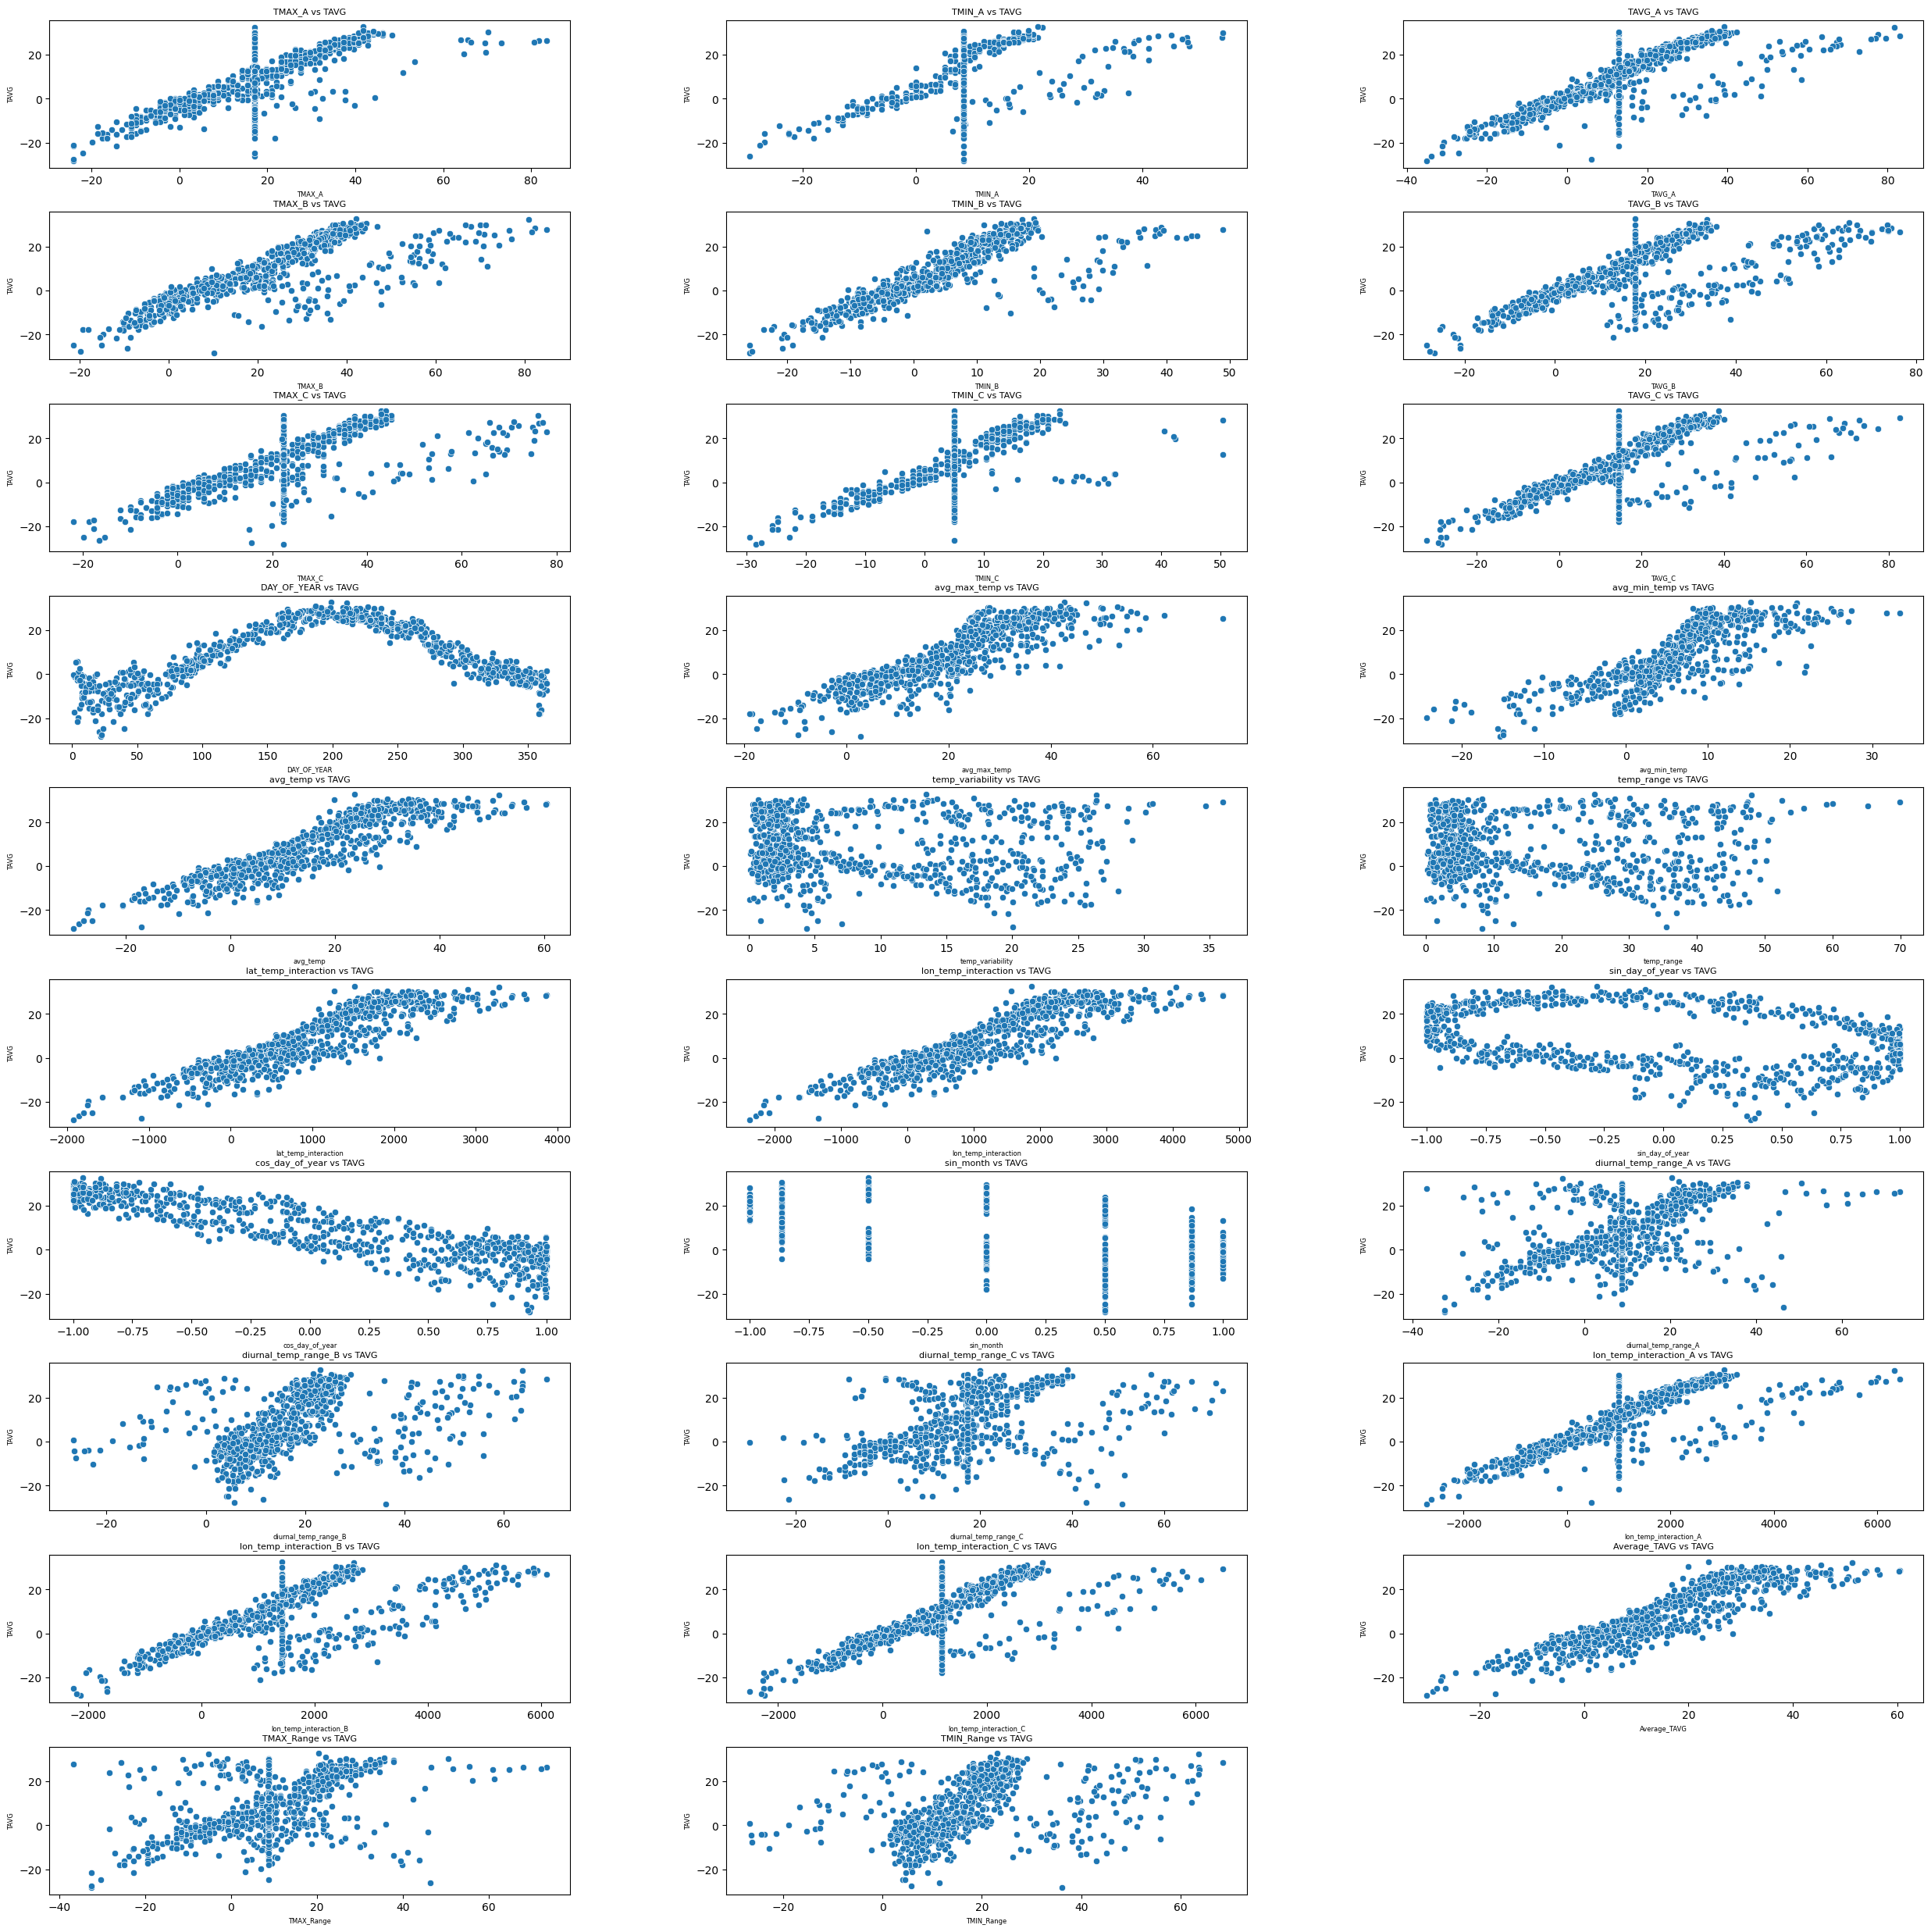

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Specify the target variable
target_variable = 'TAVG'

# List of feature columns (excluding the target variable)
feature_columns = [col for col in train_df.columns if col != target_variable]

# Create a grid of scatter plots
n_features = len(feature_columns)
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Number of rows in the grid

# Determine the size of the figure to fit in a smaller square box
fig_size = max(10, 3 * n_rows)  # Reduce the size to make it smaller

# Create a figure with square aspect ratio
fig, axs = plt.subplots(n_rows, n_cols, figsize=(fig_size, fig_size))
axs = axs.flatten()

for i, feature in enumerate(feature_columns):
    sns.scatterplot(x=train_df[feature], y=train_df[target_variable], ax=axs[i])
    axs[i].set_title(f'{feature} vs {target_variable}', fontsize=8)
    axs[i].set_xlabel(feature, fontsize=6)
    axs[i].set_ylabel(target_variable, fontsize=6)

# Hide any unused subplots
for i in range(len(feature_columns), len(axs)):
    fig.delaxes(axs[i])

# Adjust layout to fit everything nicely with equal spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)
plt.show()

In [20]:
train_df.shape

(812, 30)

In [21]:
train_df.columns

Index(['TMAX_A', 'TMIN_A', 'TAVG_A', 'TMAX_B', 'TMIN_B', 'TAVG_B', 'TMAX_C',
       'TMIN_C', 'TAVG_C', 'TAVG', 'DAY_OF_YEAR', 'avg_max_temp',
       'avg_min_temp', 'avg_temp', 'temp_variability', 'temp_range',
       'lat_temp_interaction', 'lon_temp_interaction', 'sin_day_of_year',
       'cos_day_of_year', 'sin_month', 'diurnal_temp_range_A',
       'diurnal_temp_range_B', 'diurnal_temp_range_C',
       'lon_temp_interaction_A', 'lon_temp_interaction_B',
       'lon_temp_interaction_C', 'Average_TAVG', 'TMAX_Range', 'TMIN_Range'],
      dtype='object')

In [22]:
# Feature Selection
target = 'TAVG'
X_train = train_df.drop(columns=[target])
y_train = train_df[target]
X_test = test_df

In [23]:
# Calculate Mutual Information for each feature with respect to the target
mi = mutual_info_regression(X_train, y_train)

# Convert to a pandas Series for easier interpretation
mi_series = pd.Series(mi, index=X_train.columns)

# Sort features by Mutual Information value
mi_sorted = mi_series.sort_values(ascending=False)

<ipython-input-24-e6cd4414cc25>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_sorted.values, y=mi_sorted.index, palette='viridis')


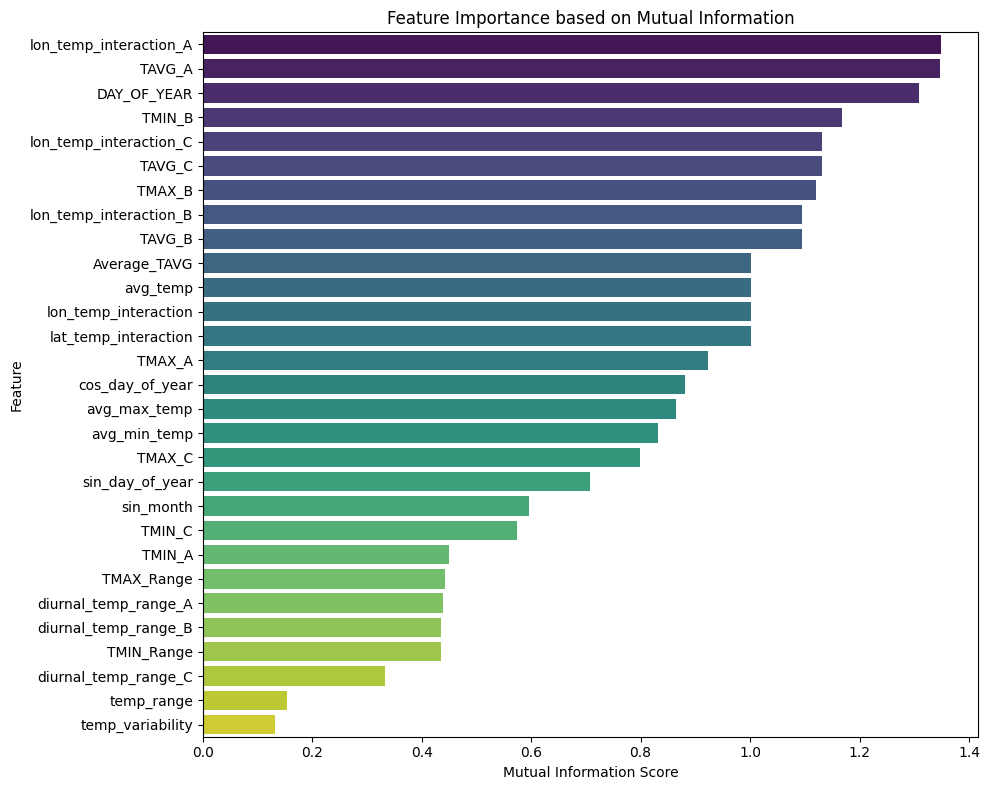

In [24]:


# Plotting the sorted Mutual Information scores
plt.figure(figsize=(10, 8))
sns.barplot(x=mi_sorted.values, y=mi_sorted.index, palette='viridis')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
#Model Training and Hyperparameter Tuning

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Assuming X_train and y_train are already defined
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Polynomial Features (optional)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Feature Selection using Elastic Net
selector = SelectFromModel(ElasticNet(alpha=0.1, l1_ratio=0.8, random_state=42)).fit(X_train_poly, y_train)
X_train_selected = selector.transform(X_train_poly)
X_test_selected = selector.transform(X_test_poly)

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

# Hyperparameter Tuning for Base Models
# Elastic Net Randomized Search
elastic_net_param_dist = {
    'alpha': np.logspace(-3, 3, 7),
    'l1_ratio': np.linspace(0.1, 0.9, 5)
}
elastic_net_random_search = RandomizedSearchCV(
    ElasticNet(random_state=42),
    elastic_net_param_dist,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
elastic_net_random_search.fit(X_train_selected, y_train)
best_elastic_net_model = elastic_net_random_search.best_estimator_

# Gradient Boosting Randomized Search
gbr_param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5]
}
gbr_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gbr_param_dist,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
gbr_random_search.fit(X_train_selected, y_train)
best_gbr_model = gbr_random_search.best_estimator_

# XGBRegressor Randomized Search
xgb_param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5]
}
xgb_random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    xgb_param_dist,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
xgb_random_search.fit(X_train_selected, y_train)
best_xgb_model = xgb_random_search.best_estimator_




# Enhanced Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('elasticnet', best_elastic_net_model),
        ('ridge', Ridge(alpha=20.0)),  # Adjusted alpha
        ('lasso', Lasso(alpha=5.0)),   # Adjusted alpha
        ('gbr', best_gbr_model),
        ('xgb', best_xgb_model),
    ],
    final_estimator=Ridge(alpha=10.0)  # Adjusted alpha
)
stacking_regressor.fit(X_train_selected, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


StackingRegressor(estimators=[('elasticnet',
                               ElasticNet(alpha=0.1,
                                          l1_ratio=0.30000000000000004,
                                          random_state=42)),
                              ('ridge', Ridge(alpha=20.0)),
                              ('lasso', Lasso(alpha=5.0)),
                              ('gbr',
                               GradientBoostingRegressor(learning_rate=0.05,
                                                         max_depth=5,
                                                         random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_byno...
                                                                         random_state=42, ...)),
                                                           ('rf',
                                                            RandomForestRegressor(max_depth=10,
                                                                                  n_estimators=200,
                                                                                  n_jobs=-1,
                                                                                  random_state=42)),
                                                           ('bagging',
                                                            BaggingRegressor(base_estimator=ElasticNet(alpha=0.1,
                                                                                                       l1_ratio=0.8,
                                                                                                       random_state=42),
                                                                             n_estimators=100,
                                                                             n_jobs=-1,
                                                                             random_state=42)),
                                                           ('histgbr',
                                                            HistGradientBoostingRegressor(max_iter=200,
                                                                                          random_state=42))],
                                               n_jobs=-1))],
                  final_estimator=Ridge(alpha=10.0))

In [26]:
# Evaluation
y_train_pred_stacking = stacking_regressor.predict(X_train_selected)
print("Training Mean Absolute Error (stacking):", mean_absolute_error(y_train, y_train_pred_stacking))
print("Training R^2 Score:", r2_score(y_train, y_train_pred_stacking))
print("Training Mean Squared Error:", mean_squared_error(y_train, y_train_pred_stacking))


Training Mean Absolute Error (stacking): 0.9497512718774489
Training R^2 Score: 0.9918634435694152
Training Mean Squared Error: 1.4919298164137194


In [27]:
# Predictions on test data
y_test_pred_stacking_ = stacking_regressor.predict(X_test_selected)
output_data = pd.DataFrame({
    'INDEX': test_df.index,
    'TAVG': y_test_pred_stacking_
})
output_data.to_csv('finalprediction.csv', index=False)

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming train_df is already defined and contains the features and target
X = X_train
y = train_df['TAVG']

# Split the data for visualization purposes (e.g., 80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.878e+03, tolerance: 1.148e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.410e+03, tolerance: 9.350e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.230e+03, tolerance: 9.151e

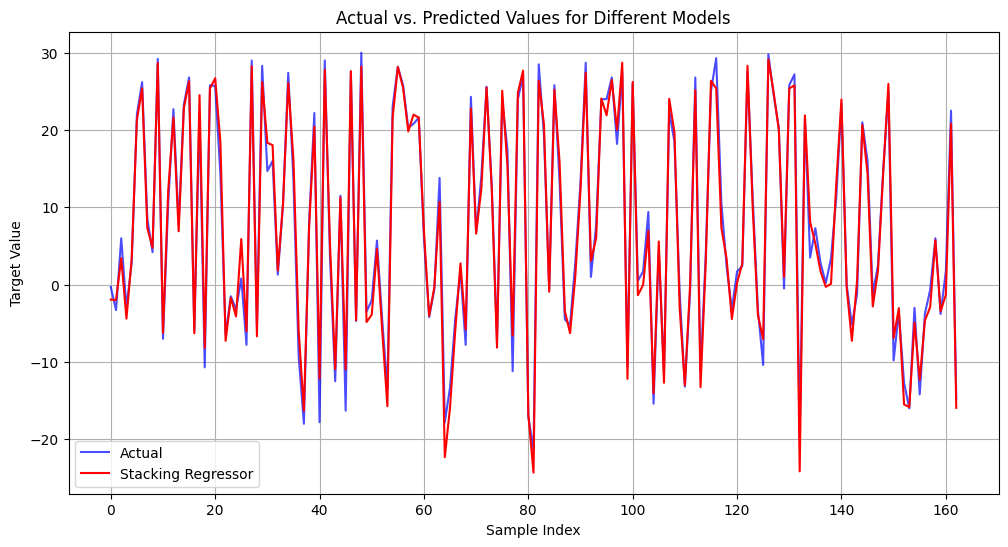

In [29]:
# Train the model using X_train and y_train
stacking_regressor.fit(X_train, y_train)
# Predict using the validation set
y_val_stacking = stacking_regressor.predict(X_val)

plt.figure(figsize=(12, 6))

# Plot Actual Values
plt.plot(y_val.values, label='Actual', color='blue', alpha=0.7)

# Plot Predicted Values for each model
plt.plot(y_val_stacking, label='Stacking Regressor', color='red')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs. Predicted Values for Different Models')
plt.legend()
plt.grid(True)
plt.show()